In [ ]:
%matplotlib inline
!pip install geopandas
!pip install contextily
import pandas as pd
import geopandas
import contextily as ctx

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 41.9 MB/s 
     |████████████████████████████████| 6.3 MB 52.3 MB/s 
     |████████████████████████████████| 19.3 MB 7.4 MB/s 


1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf')

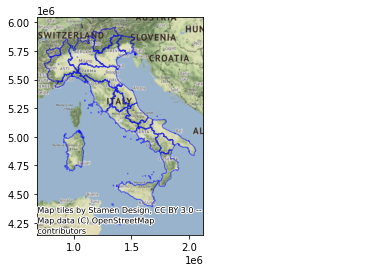

In [ ]:
ax = regioni.to_crs(epsg=3857).plot(alpha=0.5,edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa (https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

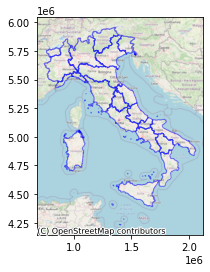

In [ ]:
ax = regioni.to_crs(epsg=3857).plot(alpha=0.5,edgecolor='b',facecolor='none')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

3. visualizzare le province della Lombardia su una mappa di contextily

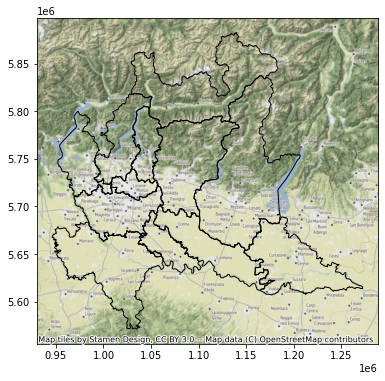

In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf')
lombardia = regioni.loc[regioni['DEN_REG'] == 'Lombardia', 'geometry'].squeeze()
ax = province[province.within(lombardia)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='none', figsize=(12,6))
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

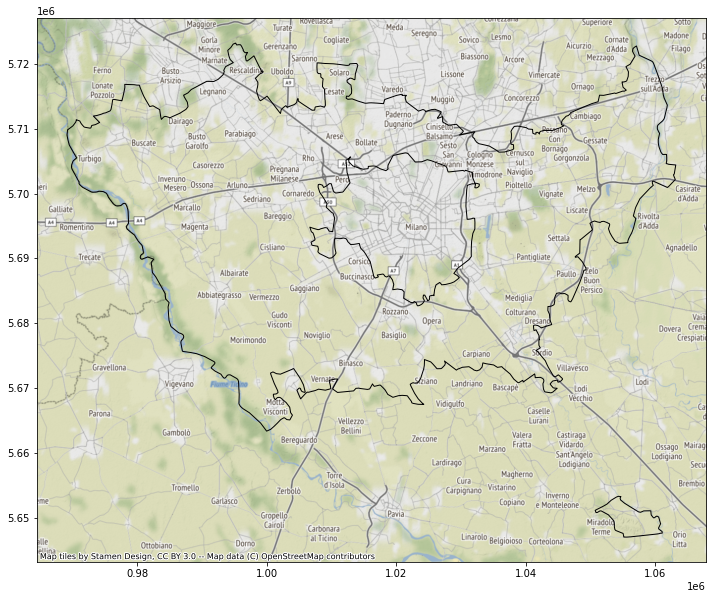

In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf')
prov_milano = province.loc[province['DEN_CM'] == 'Milano']
com_milano = comuni.loc[comuni['COMUNE'] == 'Milano']
ax = prov_milano.to_crs(epsg=3857).plot(edgecolor='k', facecolor='none', figsize=(15, 10))
com_milano.to_crs(epsg=3857).plot(ax=ax, edgecolor='k',facecolor='none')
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 

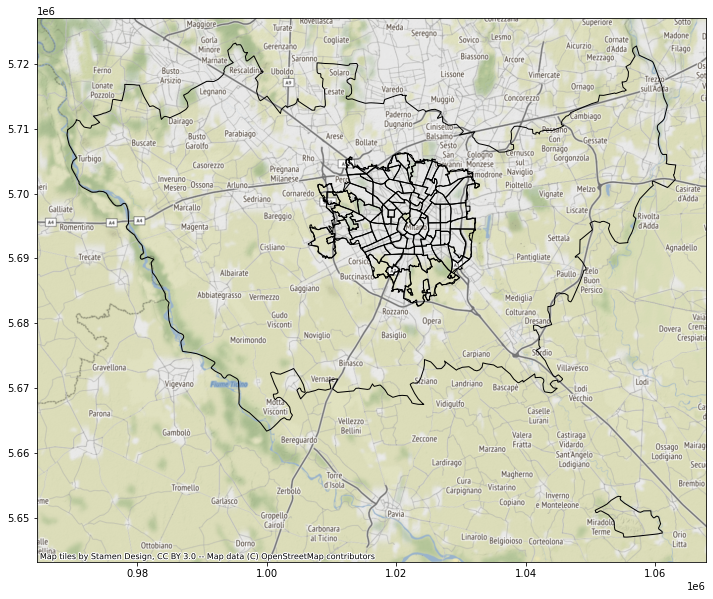

In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm (1)/NIL_WM.dbf')
prov_milano = province.loc[province['DEN_CM'] == 'Milano']
com_milano = comuni.loc[comuni['COMUNE'] == 'Milano']
ax = prov_milano.to_crs(epsg=3857).plot(edgecolor='k', facecolor='none', figsize=(15, 10))
com_milano.to_crs(epsg=3857).plot(ax=ax, edgecolor='k',facecolor='none')
quartieri.to_crs(epsg=3857).plot(ax=ax, edgecolor='k',facecolor='none')
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

Inserire una provincia della Lombardia: Varese


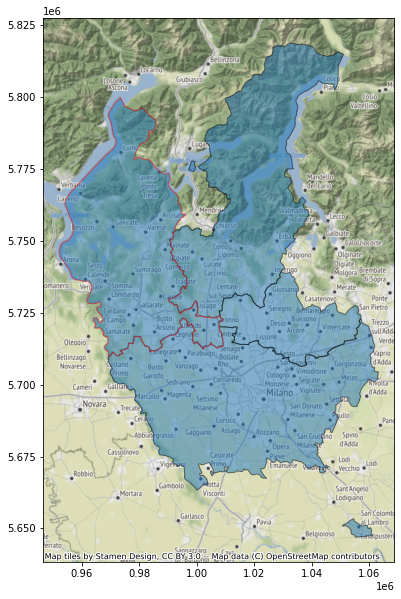

In [ ]:
prov_lombardia = province[province.within(lombardia)]
utente = input('Inserire una provincia della Lombardia: ')
lst = list(prov_lombardia['DEN_UTS'])
if utente not in lst:
  print('Provincia non in Lombardia')
else:
  prov = prov_lombardia[prov_lombardia['DEN_UTS'] == utente].geometry.squeeze()
  prov2 = prov_lombardia[prov_lombardia['DEN_UTS'] == utente]
  ax = prov_lombardia[prov_lombardia.touches(prov)].to_crs(epsg=3857).plot(edgecolor='k',alpha=0.5,figsize=(15,10))
  prov2.to_crs(epsg=3857).plot(ax=ax, edgecolor='r',alpha=0.5)
  ctx.add_basemap(ax)